In [33]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [89]:
def find_exp(query):
    return col.find(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = []
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff.append((exp, data[:,1]))
        axes.plot(data[:,0], data[:,1])
        
    vmax = 0.0
    besta = []
    for d in ldiff:
        nmax = np.sum(d[1]) 
        if nmax > vmax:
            vmax = nmax
            besta = d[0]
            
    axes = fig.add_subplot(1, 2, 2)
    data = np.array(besta['result'])
    axes.plot(data[:,0], data[:,1], 'r')
    axes.plot(data[:,0], data[:,3], 'b')

           
            
    return besta

In [158]:
query1= {'status':'done', 
              #  'data.lag':18, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [159]:
count_exp(query1)

221


In [160]:
res1= find_exp(query1)

#print res1['arch']

1
30
[0, 1, 2, 3, 4, 5]
GRU
2
48
0.5
False
tanh
[0.9025216  0.80182743 0.72374848 0.66674898 0.61039842 0.56864706
 0.52919836 0.49452539 0.47690784 0.45502702 0.44430613 0.4229724 ]


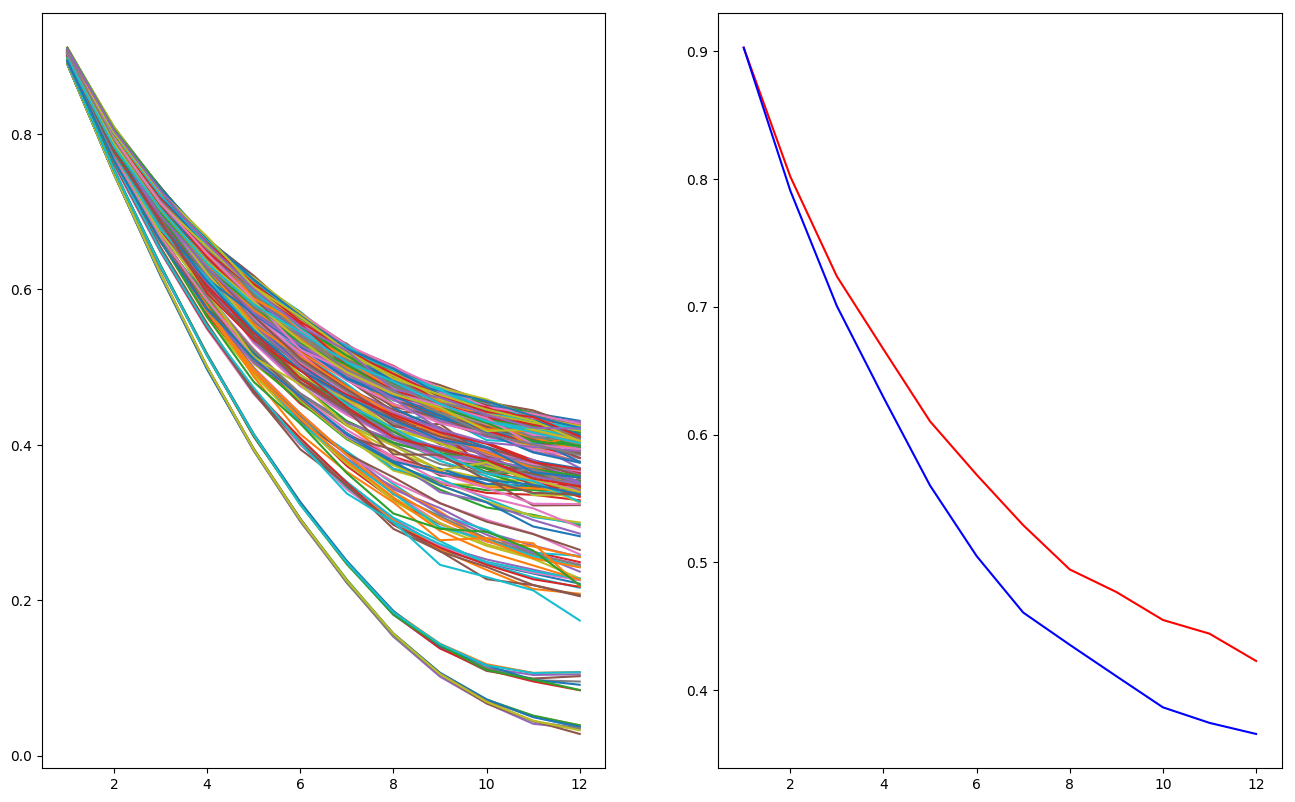

In [161]:
best = compare_exp(res1)

print(best['data']['dataset'])
print(best['data']['lag'])
print(best['data']['vars'])
print(best['arch']['rnn'])
print(best['arch']['nlayers'])
print(best['arch']['neurons'])
print(best['arch']['drop'])
print(best['arch']['bidirectional'])
print(best['arch']['activation'])

print(np.array(best['result'])[:,1])